# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 568


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
city_url = f"{url}appid={weather_api_key}&q={city.replace(' ', '%20')}"
city_weather = requests.get(city_url).json()


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city.replace(' ', '%20')}"
    
    print(city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        print(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?appid=2b9e0576aee8f400b3cc92a100a0cc38&q=rio%20grande
Processing Record 1 of Set 1 | rio grande
{'coord': {'lon': -52.0986, 'lat': -32.035}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 284.79, 'feels_like': 284.39, 'temp_min': 284.79, 'temp_max': 286.21, 'pressure': 1013, 'humidity': 91, 'sea_level': 1013, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 10.17, 'deg': 150, 'gust': 13.71}, 'rain': {'1h': 0.56}, 'clouds': {'all': 100}, 'dt': 1694632642, 'sys': {'type': 2, 'id': 2020865, 'country': 'BR', 'sunrise': 1694597419, 'sunset': 1694639930}, 'timezone': -10800, 'id': 3451138, 'name': 'Rio Grande', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=2b9e0576aee8f400b3cc92a100a0cc38&q=puerto%20natales
Processing Record 2 of Set 1 | puerto natales
{'coord': {'lon': -72.4875, 'l

{'coord': {'lon': 19.2345, 'lat': -34.4187}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 286.37, 'feels_like': 285.84, 'temp_min': 286.37, 'temp_max': 286.37, 'pressure': 1015, 'humidity': 80, 'sea_level': 1015, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 8.59, 'deg': 286, 'gust': 11.18}, 'clouds': {'all': 0}, 'dt': 1694632524, 'sys': {'type': 2, 'id': 2006131, 'country': 'ZA', 'sunrise': 1694580365, 'sunset': 1694622753}, 'timezone': 7200, 'id': 3366880, 'name': 'Hermanus', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=2b9e0576aee8f400b3cc92a100a0cc38&q=puerto%20ayora
Processing Record 16 of Set 1 | puerto ayora
{'coord': {'lon': -90.3518, 'lat': -0.7393}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 299.57, 'feels_like': 299.57, 'temp_min': 299.57, 'temp_max': 303.13, 'pressure': 1010, 'hum

{'coord': {'lon': -176.5597, 'lat': -43.9535}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 283.61, 'feels_like': 282.75, 'temp_min': 283.61, 'temp_max': 283.61, 'pressure': 1014, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 3.58, 'deg': 243, 'gust': 8.49}, 'clouds': {'all': 88}, 'dt': 1694632518, 'sys': {'type': 2, 'id': 2040615, 'country': 'NZ', 'sunrise': 1694713813, 'sunset': 1694756018}, 'timezone': 45900, 'id': 4032804, 'name': 'Waitangi', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=2b9e0576aee8f400b3cc92a100a0cc38&q=iskateley
Processing Record 30 of Set 1 | iskateley
{'coord': {'lon': 53.1512, 'lat': 67.6803}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 287.46, 'feels_like': 287.01, 'temp_min': 287.46, 'temp_max': 287.46, 'pressure': 1009, 'humidity': 79, 'sea_level': 1009, 'grn

{'coord': {'lon': 20.0403, 'lat': -34.5322}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 284.5, 'feels_like': 283.7, 'temp_min': 284.5, 'temp_max': 284.5, 'pressure': 1014, 'humidity': 77, 'sea_level': 1014, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 6.96, 'deg': 262, 'gust': 14.27}, 'clouds': {'all': 0}, 'dt': 1694632533, 'sys': {'country': 'ZA', 'sunrise': 1694580174, 'sunset': 1694622557}, 'timezone': 7200, 'id': 1015776, 'name': 'Bredasdorp', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=2b9e0576aee8f400b3cc92a100a0cc38&q=grytviken
Processing Record 44 of Set 1 | grytviken
{'coord': {'lon': -36.5092, 'lat': -54.2811}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 263.71, 'feels_like': 259.32, 'temp_min': 263.71, 'temp_max': 263.71, 'pressure': 1012, 'humidity': 71, 'sea_level': 1012, '

{'coord': {'lon': 112.4714, 'lat': 63.0128}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 273.24, 'feels_like': 268.9, 'temp_min': 273.24, 'temp_max': 273.24, 'pressure': 1007, 'humidity': 83, 'sea_level': 1007, 'grnd_level': 962}, 'visibility': 10000, 'wind': {'speed': 4.11, 'deg': 290, 'gust': 11.2}, 'clouds': {'all': 35}, 'dt': 1694632927, 'sys': {'country': 'RU', 'sunrise': 1694641793, 'sunset': 1694689338}, 'timezone': 32400, 'id': 2025456, 'name': 'Chernyshevskiy', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=2b9e0576aee8f400b3cc92a100a0cc38&q=petropavlovsk-kamchatsky
Processing Record 6 of Set 2 | petropavlovsk-kamchatsky
{'coord': {'lon': 158.6483, 'lat': 53.0452}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 287.48, 'feels_like': 287.58, 'temp_min': 287.47, 'temp_max': 287.48, 'pressure': 10

{'coord': {'lon': 105.6791, 'lat': -10.4217}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 296.97, 'feels_like': 297.71, 'temp_min': 296.97, 'temp_max': 296.97, 'pressure': 1016, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 5.66, 'deg': 130}, 'clouds': {'all': 75}, 'dt': 1694632826, 'sys': {'type': 1, 'id': 9592, 'country': 'CX', 'sunrise': 1694645554, 'sunset': 1694688837}, 'timezone': 25200, 'id': 2078127, 'name': 'Flying Fish Cove', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=2b9e0576aee8f400b3cc92a100a0cc38&q=pingliang
Processing Record 18 of Set 2 | pingliang
{'coord': {'lon': 106.6861, 'lat': 35.5392}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 288, 'feels_like': 287.86, 'temp_min': 288, 'temp_max': 288, 'pressure': 1012, 'humidity': 89, 'sea_level': 1012, 'grnd_level': 864}, 'visibility'

{'coord': {'lon': 25.5701, 'lat': -33.918}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 289.31, 'feels_like': 289.28, 'temp_min': 289.31, 'temp_max': 289.31, 'pressure': 1009, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 1.54, 'deg': 50}, 'clouds': {'all': 0}, 'dt': 1694632831, 'sys': {'type': 1, 'id': 1973, 'country': 'ZA', 'sunrise': 1694578835, 'sunset': 1694621242}, 'timezone': 7200, 'id': 964420, 'name': 'Port Elizabeth', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=2b9e0576aee8f400b3cc92a100a0cc38&q=caussade
Processing Record 30 of Set 2 | caussade
{'coord': {'lon': 1.5391, 'lat': 44.1608}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 292.3, 'feels_like': 292.23, 'temp_min': 292.3, 'temp_max': 292.3, 'pressure': 1020, 'humidity': 75, 'sea_level': 1020, 'grnd_level': 1007}, 'visibility': 10000,

{'coord': {'lon': -76.726, 'lat': 34.7229}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 299.47, 'feels_like': 299.47, 'temp_min': 298.15, 'temp_max': 302.61, 'pressure': 1013, 'humidity': 80}, 'visibility': 10000, 'wind': {'speed': 2.57, 'deg': 30}, 'clouds': {'all': 100}, 'dt': 1694632771, 'sys': {'type': 2, 'id': 2035286, 'country': 'US', 'sunrise': 1694602101, 'sunset': 1694647066}, 'timezone': -14400, 'id': 4480153, 'name': 'Morehead City', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=2b9e0576aee8f400b3cc92a100a0cc38&q=utrik
Processing Record 42 of Set 2 | utrik
{'coord': {'lon': 169.8474, 'lat': 11.2278}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 301.25, 'feels_like': 305.03, 'temp_min': 301.25, 'temp_max': 301.25, 'pressure': 1011, 'humidity': 77, 'sea_level': 1011, 'grnd_level': 1011}, 'visibili

{'coord': {'lon': 55.6167, 'lat': -21.3667}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 292.36, 'feels_like': 292.56, 'temp_min': 292.3, 'temp_max': 292.36, 'pressure': 1022, 'humidity': 85, 'sea_level': 1022, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 3.72, 'deg': 83, 'gust': 4.82}, 'rain': {'1h': 0.12}, 'clouds': {'all': 44}, 'dt': 1694632932, 'sys': {'type': 1, 'id': 2127, 'country': 'RE', 'sunrise': 1694571389, 'sunset': 1694614270}, 'timezone': 14400, 'id': 6690296, 'name': 'Saint-Joseph', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=2b9e0576aee8f400b3cc92a100a0cc38&q=san%20patricio
Processing Record 6 of Set 3 | san patricio
{'coord': {'lon': -97.5169, 'lat': 28.017}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 308.14, 'feels_like': 310.65, 'temp_min': 305.83, 'temp_max': 309.3, 'pr

{'coord': {'lon': 112.4, 'lat': 66.4167}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 272.29, 'feels_like': 268.33, 'temp_min': 272.29, 'temp_max': 272.29, 'pressure': 1005, 'humidity': 100, 'sea_level': 1005, 'grnd_level': 970}, 'visibility': 10000, 'wind': {'speed': 3.33, 'deg': 307, 'gust': 4.97}, 'clouds': {'all': 72}, 'dt': 1694632533, 'sys': {'type': 2, 'id': 49565, 'country': 'RU', 'sunrise': 1694641459, 'sunset': 1694689706}, 'timezone': 32400, 'id': 2014624, 'name': 'Udachny', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=2b9e0576aee8f400b3cc92a100a0cc38&q=pisco
Processing Record 19 of Set 3 | pisco
{'coord': {'lon': -76.2167, 'lat': -13.7}, 'weather': [{'id': 761, 'main': 'Dust', 'description': 'dust', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 295.18, 'feels_like': 295.11, 'temp_min': 293.72, 'temp_max': 295.18, 'pressure': 1012, 'humidity': 64}, 'visibility': 20

{'coord': {'lon': 72.9667, 'lat': 3.7833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 300.99, 'feels_like': 304.57, 'temp_min': 300.99, 'temp_max': 300.99, 'pressure': 1011, 'humidity': 78, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 4.84, 'deg': 176, 'gust': 5.14}, 'clouds': {'all': 100}, 'dt': 1694632892, 'sys': {'country': 'MV', 'sunrise': 1694653187, 'sunset': 1694696902}, 'timezone': 18000, 'id': 1337605, 'name': 'Mahibadhoo', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=2b9e0576aee8f400b3cc92a100a0cc38&q=margaret%20river
Processing Record 32 of Set 3 | margaret river
{'coord': {'lon': 115.0667, 'lat': -33.95}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 286.61, 'feels_like': 285.53, 'temp_min': 286.61, 'temp_max': 286.61, 'pressure': 1010, 'humidity': 58, 

{'coord': {'lon': -35.1478, 'lat': -8.8978}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 298.93, 'feels_like': 299.6, 'temp_min': 298.93, 'temp_max': 298.93, 'pressure': 1014, 'humidity': 78, 'sea_level': 1014, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 5.06, 'deg': 137, 'gust': 6.27}, 'clouds': {'all': 11}, 'dt': 1694632936, 'sys': {'country': 'BR', 'sunrise': 1694592951, 'sunset': 1694636263}, 'timezone': -10800, 'id': 3388456, 'name': 'São José da Coroa Grande', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=2b9e0576aee8f400b3cc92a100a0cc38&q=thompson
Processing Record 44 of Set 3 | thompson
{'coord': {'lon': -97.8558, 'lat': 55.7435}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 292.24, 'feels_like': 291.85, 'temp_min': 292.24, 'temp_max': 292.24, 'pressure': 1008, 'humidity': 63}, 'vis

{'coord': {'lon': 79.9186, 'lat': 45.41}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 285.85, 'feels_like': 284.46, 'temp_min': 285.85, 'temp_max': 285.85, 'pressure': 1017, 'humidity': 49, 'sea_level': 1017, 'grnd_level': 928}, 'visibility': 10000, 'wind': {'speed': 1.66, 'deg': 202, 'gust': 1.61}, 'clouds': {'all': 56}, 'dt': 1694632938, 'sys': {'country': 'KZ', 'sunrise': 1694650609, 'sunset': 1694696144}, 'timezone': 21600, 'id': 1519691, 'name': 'Sarkand', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=2b9e0576aee8f400b3cc92a100a0cc38&q=mukah
Processing Record 7 of Set 4 | mukah
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=2b9e0576aee8f400b3cc92a100a0cc38&q=fale%20old%20settlement
Processing Record 8 of Set 4 | fale old settlement
{'coord': {'lon': -171.2468, 'lat': -9.3852}, 'weather': [{'id': 800, 'm

{'coord': {'lon': -82.8667, 'lat': 8.2833}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 300.42, 'feels_like': 302.66, 'temp_min': 300.35, 'temp_max': 306.14, 'pressure': 1011, 'humidity': 72}, 'visibility': 10000, 'wind': {'speed': 0.45, 'deg': 101, 'gust': 1.34}, 'rain': {'1h': 0.33}, 'clouds': {'all': 40}, 'dt': 1694632713, 'sys': {'type': 2, 'id': 2083346, 'country': 'PA', 'sunrise': 1694604121, 'sunset': 1694647993}, 'timezone': -18000, 'id': 3702431, 'name': 'Puerto Armuelles', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=2b9e0576aee8f400b3cc92a100a0cc38&q=kiunga
Processing Record 20 of Set 4 | kiunga
{'coord': {'lon': 141.2906, 'lat': -6.1219}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 295.44, 'feels_like': 296.1, 'temp_min': 295.44, 'temp_max': 295.44, 'pressure': 1013, 'humidity': 91, 'sea_leve

{'coord': {'lon': 173.9474, 'lat': -35.2268}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 281.99, 'feels_like': 281.29, 'temp_min': 281.99, 'temp_max': 281.99, 'pressure': 1026, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 1.68, 'deg': 253, 'gust': 4.32}, 'clouds': {'all': 47}, 'dt': 1694632771, 'sys': {'type': 2, 'id': 2012217, 'country': 'NZ', 'sunrise': 1694629602, 'sunset': 1694672029}, 'timezone': 43200, 'id': 2188874, 'name': 'Kerikeri', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=2b9e0576aee8f400b3cc92a100a0cc38&q=hammerfest
Processing Record 33 of Set 4 | hammerfest
{'coord': {'lon': 23.6821, 'lat': 70.6634}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 279.4, 'feels_like': 275.38, 'temp_min': 279.4, 'temp_max': 279.4, 'pressure': 1011, 'humidity': 87}, 'visibility': 10000, 'wind': {'

{'coord': {'lon': 53.087, 'lat': 67.6713}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 287.51, 'feels_like': 287.06, 'temp_min': 287.51, 'temp_max': 287.51, 'pressure': 1009, 'humidity': 79, 'sea_level': 1009, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 8.43, 'deg': 219, 'gust': 16.95}, 'clouds': {'all': 41}, 'dt': 1694632552, 'sys': {'country': 'RU', 'sunrise': 1694568966, 'sunset': 1694617907}, 'timezone': 10800, 'id': 523392, 'name': 'Naryan-Mar', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=2b9e0576aee8f400b3cc92a100a0cc38&q=emmett
Processing Record 46 of Set 4 | emmett
{'coord': {'lon': -116.4993, 'lat': 43.8735}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 298.78, 'feels_like': 298.36, 'temp_min': 296.66, 'temp_max': 300.18, 'pressure': 1017, 'humidity': 37}, 'visibility': 10000, '

{'coord': {'lon': 102.1739, 'lat': 38.4953}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 293.81, 'feels_like': 292.69, 'temp_min': 293.81, 'temp_max': 293.81, 'pressure': 1004, 'humidity': 29, 'sea_level': 1004, 'grnd_level': 841}, 'visibility': 10000, 'wind': {'speed': 1.89, 'deg': 288, 'gust': 1.89}, 'clouds': {'all': 86}, 'dt': 1694632578, 'sys': {'country': 'CN', 'sunrise': 1694645485, 'sunset': 1694690588}, 'timezone': 28800, 'id': 1805733, 'name': 'Jinchang', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=2b9e0576aee8f400b3cc92a100a0cc38&q=fort%20bragg
Processing Record 8 of Set 5 | fort bragg
{'coord': {'lon': -79.006, 'lat': 35.139}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 303.45, 'feels_like': 306.56, 'temp_min': 301.47, 'temp_max': 304.72, 'pressure': 1013, 'humidity': 60}, 'visibility

{'coord': {'lon': 122.5431, 'lat': 13.2158}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 300.02, 'feels_like': 302.78, 'temp_min': 300.02, 'temp_max': 300.02, 'pressure': 1007, 'humidity': 82, 'sea_level': 1007, 'grnd_level': 1006}, 'visibility': 6075, 'wind': {'speed': 1.68, 'deg': 320, 'gust': 2.62}, 'clouds': {'all': 100}, 'dt': 1694632945, 'sys': {'country': 'PH', 'sunrise': 1694641137, 'sunset': 1694685161}, 'timezone': 28800, 'id': 1696524, 'name': 'Pagsañgahan', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=2b9e0576aee8f400b3cc92a100a0cc38&q=nieves
Processing Record 21 of Set 5 | nieves
{'coord': {'lon': 120.9485, 'lat': 15.3274}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 298.88, 'feels_like': 299.96, 'temp_min': 298.88, 'temp_max': 298.88, 'pressure': 1008, 'humidity': 94, 'sea_level': 10

{'coord': {'lon': -22.5624, 'lat': 64.0049}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 283.39, 'feels_like': 282.32, 'temp_min': 283.39, 'temp_max': 284.1, 'pressure': 1012, 'humidity': 71}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 110}, 'rain': {'1h': 0.42}, 'clouds': {'all': 75}, 'dt': 1694632523, 'sys': {'type': 1, 'id': 90, 'country': 'IS', 'sunrise': 1694587602, 'sunset': 1694635573}, 'timezone': 0, 'id': 3415496, 'name': 'Keflavik', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=2b9e0576aee8f400b3cc92a100a0cc38&q=dzilam%20gonzalez
Processing Record 35 of Set 5 | dzilam gonzalez
{'coord': {'lon': -88.9333, 'lat': 21.2833}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 306.07, 'feels_like': 311.43, 'temp_min': 306.07, 'temp_max': 306.07, 'pressure': 1011, 'humidity': 57, 'sea_level': 1011, 'grn

{'coord': {'lon': -67.4313, 'lat': 48.4638}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 288.56, 'feels_like': 288.74, 'temp_min': 288.56, 'temp_max': 288.56, 'pressure': 1015, 'humidity': 99, 'sea_level': 1015, 'grnd_level': 996}, 'visibility': 321, 'wind': {'speed': 2.46, 'deg': 126, 'gust': 8.65}, 'clouds': {'all': 100}, 'dt': 1694632948, 'sys': {'country': 'CA', 'sunrise': 1694599407, 'sunset': 1694645299}, 'timezone': -14400, 'id': 6943488, 'name': 'Amqui', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=2b9e0576aee8f400b3cc92a100a0cc38&q=kapuskasing
Processing Record 48 of Set 5 | kapuskasing
{'coord': {'lon': -82.4331, 'lat': 49.4169}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 288.15, 'feels_like': 286.93, 'temp_min': 287.2, 'temp_max': 288.15, 'pressure': 1018, 'humidity': 47}, 'visibility': 

{'coord': {'lon': 145.4333, 'lat': -17}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 288.95, 'feels_like': 288.81, 'temp_min': 288.95, 'temp_max': 290.55, 'pressure': 1021, 'humidity': 85, 'sea_level': 1021, 'grnd_level': 973}, 'visibility': 10000, 'wind': {'speed': 1.62, 'deg': 127, 'gust': 4.39}, 'clouds': {'all': 34}, 'dt': 1694632949, 'sys': {'type': 2, 'id': 2010006, 'country': 'AU', 'sunrise': 1694636119, 'sunset': 1694679195}, 'timezone': 36000, 'id': 2158767, 'name': 'Mareeba', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=2b9e0576aee8f400b3cc92a100a0cc38&q=pico%20truncado
Processing Record 12 of Set 6 | pico truncado
{'coord': {'lon': -67.9573, 'lat': -46.7949}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 285.49, 'feels_like': 283.75, 'temp_min': 285.49, 'temp_max': 285.49, 'pressure': 10

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=2b9e0576aee8f400b3cc92a100a0cc38&q=okha
Processing Record 24 of Set 6 | okha
{'coord': {'lon': 142.9478, 'lat': 53.5739}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 283.26, 'feels_like': 282.1, 'temp_min': 283.26, 'temp_max': 283.26, 'pressure': 1008, 'humidity': 68, 'sea_level': 1008, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 6.52, 'deg': 259, 'gust': 11.34}, 'clouds': {'all': 5}, 'dt': 1694632577, 'sys': {'country': 'RU', 'sunrise': 1694635114, 'sunset': 1694681392}, 'timezone': 39600, 'id': 2122614, 'name': 'Okha', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=2b9e0576aee8f400b3cc92a100a0cc38&q=alice%20springs
Processing Record 25 of Set 6 | alice springs
{'coord': {'lon': 133.8833, 'lat': -23.7}, 'weather': [{'id': 800, 'main': 'Clear', 'descri

{'coord': {'lon': 94.7333, 'lat': 51.6833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 284.51, 'feels_like': 283.37, 'temp_min': 284.51, 'temp_max': 284.51, 'pressure': 1012, 'humidity': 64, 'sea_level': 1012, 'grnd_level': 932}, 'visibility': 10000, 'wind': {'speed': 1.23, 'deg': 344, 'gust': 1.58}, 'clouds': {'all': 89}, 'dt': 1694632531, 'sys': {'country': 'RU', 'sunrise': 1694646792, 'sunset': 1694692851}, 'timezone': 25200, 'id': 1505187, 'name': 'Kaa-Khem', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=2b9e0576aee8f400b3cc92a100a0cc38&q=metz
Processing Record 38 of Set 6 | metz
{'coord': {'lon': 6.1727, 'lat': 49.1191}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 292.56, 'feels_like': 292.33, 'temp_min': 290.67, 'temp_max': 294.42, 'pressure': 1020, 'humidity': 68}, 'visibility': 10000, 'wind': {'s

{'coord': {'lon': 50.263, 'lat': 44.5086}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 293.51, 'feels_like': 293.19, 'temp_min': 293.51, 'temp_max': 293.51, 'pressure': 1020, 'humidity': 61, 'sea_level': 1020, 'grnd_level': 1022}, 'visibility': 10000, 'wind': {'speed': 1.87, 'deg': 86, 'gust': 2.11}, 'clouds': {'all': 87}, 'dt': 1694632953, 'sys': {'country': 'KZ', 'sunrise': 1694657764, 'sunset': 1694703220}, 'timezone': 18000, 'id': 609906, 'name': 'Fort-Shevchenko', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=2b9e0576aee8f400b3cc92a100a0cc38&q=wuhai
Processing Record 0 of Set 7 | wuhai
{'coord': {'lon': 106.8122, 'lat': 39.6647}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 295.52, 'feels_like': 295.12, 'temp_min': 295.52, 'temp_max': 295.52, 'pressure': 1006, 'humidity': 50, 'sea_level': 1006,

{'coord': {'lon': 49.2917, 'lat': -12.2787}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 296.05, 'feels_like': 296.46, 'temp_min': 296.05, 'temp_max': 296.05, 'pressure': 1018, 'humidity': 79, 'sea_level': 1018, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 6.83, 'deg': 133, 'gust': 12.77}, 'clouds': {'all': 6}, 'dt': 1694632579, 'sys': {'country': 'MG', 'sunrise': 1694572750, 'sunset': 1694615944}, 'timezone': 10800, 'id': 1069129, 'name': 'Antsiranana', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=2b9e0576aee8f400b3cc92a100a0cc38&q=hobyo
Processing Record 12 of Set 7 | hobyo
{'coord': {'lon': 48.5268, 'lat': 5.3505}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 298.82, 'feels_like': 299.66, 'temp_min': 298.82, 'temp_max': 298.82, 'pressure': 1012, 'humidity': 85, 'sea_level': 1012, 'grnd_level': 

{'coord': {'lon': -2.2405, 'lat': 4.8699}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 297.28, 'feels_like': 298.18, 'temp_min': 297.28, 'temp_max': 297.28, 'pressure': 1012, 'humidity': 93, 'sea_level': 1012, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 2.96, 'deg': 219, 'gust': 6.52}, 'rain': {'1h': 0.16}, 'clouds': {'all': 100}, 'dt': 1694632956, 'sys': {'country': 'GH', 'sunrise': 1694584831, 'sunset': 1694628592}, 'timezone': 0, 'id': 2303611, 'name': 'Esim', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=2b9e0576aee8f400b3cc92a100a0cc38&q=lluta
Processing Record 24 of Set 7 | lluta
{'coord': {'lon': -72.0142, 'lat': -16.0147}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 289.72, 'feels_like': 287.95, 'temp_min': 289.72, 'temp_max': 289.72, 'pressure': 1015, 'humidity': 20, 'sea_level': 1015, '

{'coord': {'lon': 134.26, 'lat': 46.8161}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 283.24, 'feels_like': 282.76, 'temp_min': 283.24, 'temp_max': 283.24, 'pressure': 1017, 'humidity': 94, 'sea_level': 1017, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 1.19, 'deg': 144, 'gust': 1.18}, 'clouds': {'all': 4}, 'dt': 1694632958, 'sys': {'country': 'RU', 'sunrise': 1694637503, 'sunset': 1694683172}, 'timezone': 36000, 'id': 2026696, 'name': 'Bikin', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=2b9e0576aee8f400b3cc92a100a0cc38&q=el%20granada
Processing Record 39 of Set 7 | el granada
{'coord': {'lon': -122.4694, 'lat': 37.5027}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 293.95, 'feels_like': 293.99, 'temp_min': 289.03, 'temp_max': 301.17, 'pressure': 1014, 'humidity': 73}, 'visibility': 10000

{'coord': {'lon': 43.487, 'lat': 34.9311}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 305.99, 'feels_like': 304, 'temp_min': 305.99, 'temp_max': 305.99, 'pressure': 1003, 'humidity': 21, 'sea_level': 1003, 'grnd_level': 990}, 'visibility': 10000, 'wind': {'speed': 6.15, 'deg': 348, 'gust': 12.4}, 'clouds': {'all': 0}, 'dt': 1694632959, 'sys': {'country': 'IQ', 'sunrise': 1694573230, 'sunset': 1694618249}, 'timezone': 10800, 'id': 97783, 'name': 'Bayjī', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=2b9e0576aee8f400b3cc92a100a0cc38&q=oranjemund
Processing Record 2 of Set 8 | oranjemund
{'coord': {'lon': 16.4333, 'lat': -28.55}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 286.1, 'feels_like': 285.75, 'temp_min': 286.1, 'temp_max': 286.1, 'pressure': 1021, 'humidity': 88, 'sea_level': 1021, 'grnd_level': 1017}, 'v

{'coord': {'lon': 55.5886, 'lat': 56.4311}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 286.54, 'feels_like': 285.87, 'temp_min': 286.54, 'temp_max': 286.54, 'pressure': 1024, 'humidity': 74, 'sea_level': 1024, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 1.35, 'deg': 67, 'gust': 1.35}, 'clouds': {'all': 100}, 'dt': 1694632961, 'sys': {'country': 'RU', 'sunrise': 1694655949, 'sunset': 1694702480}, 'timezone': 18000, 'id': 538046, 'name': 'Kuyeda', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=2b9e0576aee8f400b3cc92a100a0cc38&q=kuna
Processing Record 16 of Set 8 | kuna
{'coord': {'lon': -116.4201, 'lat': 43.4918}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 297.32, 'feels_like': 296.89, 'temp_min': 296.02, 'temp_max': 299.55, 'pressure': 1016, 'humidity': 42}, 'visibility': 10000, 'wind': {'

{'coord': {'lon': 134.7173, 'lat': 8.0823}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 301.3, 'feels_like': 305.15, 'temp_min': 301.3, 'temp_max': 301.3, 'pressure': 1009, 'humidity': 77, 'sea_level': 1009, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 4.62, 'deg': 234, 'gust': 5.33}, 'clouds': {'all': 100}, 'dt': 1694632560, 'sys': {'country': 'PW', 'sunrise': 1694638301, 'sunset': 1694682155}, 'timezone': 32400, 'id': 7670994, 'name': 'Kayangel', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=2b9e0576aee8f400b3cc92a100a0cc38&q=verdal
Processing Record 30 of Set 8 | verdal
{'coord': {'lon': 11.4817, 'lat': 63.7933}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 282.17, 'feels_like': 282.17, 'temp_min': 282.17, 'temp_max': 282.17, 'pressure': 1022, 'humidity': 88, 'sea_level': 1022, 'grnd_leve

{'coord': {'lon': 0.5729, 'lat': 50.8552}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 289.11, 'feels_like': 287.75, 'temp_min': 287.58, 'temp_max': 291.22, 'pressure': 1022, 'humidity': 38, 'sea_level': 1022, 'grnd_level': 1019}, 'visibility': 10000, 'wind': {'speed': 4.08, 'deg': 75, 'gust': 4.56}, 'clouds': {'all': 98}, 'dt': 1694632964, 'sys': {'type': 2, 'id': 2032234, 'country': 'GB', 'sunrise': 1694582961, 'sunset': 1694629112}, 'timezone': 3600, 'id': 2647356, 'name': 'Hastings', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=2b9e0576aee8f400b3cc92a100a0cc38&q=namibe
Processing Record 43 of Set 8 | namibe
{'coord': {'lon': 12.1522, 'lat': -15.1961}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 290.61, 'feels_like': 290.37, 'temp_min': 290.61, 'temp_max': 290.61, 'pressure': 1014, 'humidity': 75, 'se

{'coord': {'lon': 5.9167, 'lat': 48.6667}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 292.55, 'feels_like': 292.63, 'temp_min': 289.6, 'temp_max': 293.92, 'pressure': 1021, 'humidity': 80}, 'visibility': 10000, 'wind': {'speed': 1.54, 'deg': 290}, 'clouds': {'all': 0}, 'dt': 1694632965, 'sys': {'type': 1, 'id': 6593, 'country': 'FR', 'sunrise': 1694581778, 'sunset': 1694627731}, 'timezone': 7200, 'id': 2972349, 'name': 'Arrondissement de Toul', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=2b9e0576aee8f400b3cc92a100a0cc38&q=presidencia%20de%20la%20plaza
Processing Record 6 of Set 9 | presidencia de la plaza
{'coord': {'lon': -59.8424, 'lat': -27.0015}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 289.06, 'feels_like': 288.35, 'temp_min': 289.06, 'temp_max': 289.06, 'pressure': 1018, 'humidity': 63, 'sea_l

{'coord': {'lon': 66.3167, 'lat': 51.1}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 286.76, 'feels_like': 285.93, 'temp_min': 286.76, 'temp_max': 286.76, 'pressure': 1019, 'humidity': 67, 'sea_level': 1019, 'grnd_level': 990}, 'visibility': 10000, 'wind': {'speed': 2.32, 'deg': 342, 'gust': 3.14}, 'clouds': {'all': 100}, 'dt': 1694632967, 'sys': {'country': 'KZ', 'sunrise': 1694653647, 'sunset': 1694699633}, 'timezone': 21600, 'id': 1524606, 'name': 'Derzhavīnsk', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=2b9e0576aee8f400b3cc92a100a0cc38&q=crane
Processing Record 20 of Set 9 | crane
{'coord': {'lon': -102.3501, 'lat': 31.3974}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 300.37, 'feels_like': 300.92, 'temp_min': 300.37, 'temp_max': 300.37, 'pressure': 1013, 'humidity': 52, 'sea_level': 1013, 'gr

{'coord': {'lon': 2.6036, 'lat': 6.4965}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 298.05, 'feels_like': 298.92, 'temp_min': 298.05, 'temp_max': 298.05, 'pressure': 1012, 'humidity': 89, 'sea_level': 1012, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 2.68, 'deg': 205, 'gust': 6.77}, 'clouds': {'all': 78}, 'dt': 1694632858, 'sys': {'type': 1, 'id': 1119, 'country': 'BJ', 'sunrise': 1694583641, 'sunset': 1694627457}, 'timezone': 3600, 'id': 2392087, 'name': 'Porto-Novo', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=2b9e0576aee8f400b3cc92a100a0cc38&q=beypore
Processing Record 35 of Set 9 | beypore
{'coord': {'lon': 75.8167, 'lat': 11.1833}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 298.73, 'feels_like': 299.64, 'temp_min': 298.73, 'temp_max': 298.73, 'pressure': 1010, 'humidity': 88}, 'visibilit

{'coord': {'lon': 20.0053, 'lat': 39.8756}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 294.13, 'feels_like': 293.98, 'temp_min': 294.13, 'temp_max': 297, 'pressure': 1018, 'humidity': 65, 'sea_level': 1018, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 0.86, 'deg': 9, 'gust': 1.01}, 'clouds': {'all': 88}, 'dt': 1694632970, 'sys': {'type': 2, 'id': 2078321, 'country': 'AL', 'sunrise': 1694578722, 'sunset': 1694624026}, 'timezone': 7200, 'id': 363243, 'name': 'Sarandë', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=2b9e0576aee8f400b3cc92a100a0cc38&q=shamakhi
Processing Record 48 of Set 9 | shamakhi
{'coord': {'lon': 48.6414, 'lat': 40.6314}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 287.67, 'feels_like': 287.4, 'temp_min': 287.67, 'temp_max': 287.67, 'pressure': 1019, 'humidity': 85,

{'coord': {'lon': 151.9076, 'lat': -27.5648}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 283.08, 'feels_like': 283.08, 'temp_min': 283.08, 'temp_max': 283.08, 'pressure': 1027, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 0.45, 'deg': 26, 'gust': 1.79}, 'clouds': {'all': 7}, 'dt': 1694632971, 'sys': {'type': 2, 'id': 2003350, 'country': 'AU', 'sunrise': 1694634742, 'sunset': 1694677465}, 'timezone': 36000, 'id': 2146268, 'name': 'Glenvale', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=2b9e0576aee8f400b3cc92a100a0cc38&q=rio%20preto%20da%20eva
Processing Record 11 of Set 10 | rio preto da eva
{'coord': {'lon': -59.6997, 'lat': -2.6994}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 313.9, 'feels_like': 312.95, 'temp_min': 313.9, 'temp_max': 313.9, 'pressure': 1005, 'humidity': 18, 'sea_level': 1005

{'coord': {'lon': -39.0306, 'lat': -3.41}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 300.43, 'feels_like': 302.11, 'temp_min': 300.43, 'temp_max': 300.43, 'pressure': 1010, 'humidity': 66, 'sea_level': 1010, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 7.12, 'deg': 83, 'gust': 10.35}, 'clouds': {'all': 8}, 'dt': 1694632973, 'sys': {'type': 2, 'id': 2008290, 'country': 'BR', 'sunrise': 1694593794, 'sunset': 1694637283}, 'timezone': -10800, 'id': 3393115, 'name': 'Paracuru', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=2b9e0576aee8f400b3cc92a100a0cc38&q=qinzhou
Processing Record 25 of Set 10 | qinzhou
{'coord': {'lon': 108.6167, 'lat': 21.95}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 296.99, 'feels_like': 297.88, 'temp_min': 296.99, 'temp_max': 296.99, 'pressure': 1005, 'humidity': 94, 's

{'coord': {'lon': 158.4028, 'lat': 52.9306}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 288.29, 'feels_like': 288.21, 'temp_min': 288.29, 'temp_max': 288.3, 'pressure': 1010, 'humidity': 90, 'sea_level': 1010, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 3.37, 'deg': 290, 'gust': 3.35}, 'clouds': {'all': 100}, 'dt': 1694632567, 'sys': {'type': 2, 'id': 49609, 'country': 'RU', 'sunrise': 1694631433, 'sunset': 1694677656}, 'timezone': 43200, 'id': 2118647, 'name': 'Vilyuchinsk', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=2b9e0576aee8f400b3cc92a100a0cc38&q=tralee
Processing Record 38 of Set 10 | tralee
{'coord': {'lon': -9.7026, 'lat': 52.2704}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 288.17, 'feels_like': 288.21, 'temp_min': 288.17, 'temp_max': 288.17, 'pressure': 1018, 'humidity': 95

{'coord': {'lon': 97.2094, 'lat': 19.6742}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 293.32, 'feels_like': 293.95, 'temp_min': 293.32, 'temp_max': 293.32, 'pressure': 1010, 'humidity': 98, 'sea_level': 1010, 'grnd_level': 913}, 'visibility': 10000, 'wind': {'speed': 0.88, 'deg': 214, 'gust': 0.9}, 'clouds': {'all': 100}, 'dt': 1694632975, 'sys': {'country': 'MM', 'sunrise': 1694647103, 'sunset': 1694691352}, 'timezone': 23400, 'id': 1313479, 'name': 'Loikaw', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=2b9e0576aee8f400b3cc92a100a0cc38&q=volzhskiy
Processing Record 0 of Set 11 | volzhskiy
{'coord': {'lon': 44.7797, 'lat': 48.7858}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 283.88, 'feels_like': 282.31, 'temp_min': 283.88, 'temp_max': 283.88, 'pressure': 1019, 'humidity': 50, 'sea_level': 1019

{'coord': {'lon': 121.6247, 'lat': 63.7553}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 278.18, 'feels_like': 275.07, 'temp_min': 278.18, 'temp_max': 278.18, 'pressure': 996, 'humidity': 95, 'sea_level': 996, 'grnd_level': 983}, 'visibility': 10000, 'wind': {'speed': 3.95, 'deg': 242, 'gust': 7.18}, 'clouds': {'all': 100}, 'dt': 1694632552, 'sys': {'country': 'RU', 'sunrise': 1694639523, 'sunset': 1694687216}, 'timezone': 32400, 'id': 2013392, 'name': 'Vilyuysk', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=2b9e0576aee8f400b3cc92a100a0cc38&q=bam
Processing Record 14 of Set 11 | bam
{'coord': {'lon': 58.357, 'lat': 29.106}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 306.08, 'feels_like': 303.69, 'temp_min': 306.08, 'temp_max': 306.08, 'pressure': 1005, 'humidity': 10, 'sea_level': 1005, 'grnd_level': 89

{'coord': {'lon': 92.7167, 'lat': 11.7}, 'weather': [{'id': 301, 'main': 'Drizzle', 'description': 'drizzle', 'icon': '09n'}], 'base': 'stations', 'main': {'temp': 301.2, 'feels_like': 305.86, 'temp_min': 301.2, 'temp_max': 301.2, 'pressure': 1008, 'humidity': 83}, 'visibility': 5000, 'wind': {'speed': 4.12, 'deg': 210}, 'clouds': {'all': 75}, 'dt': 1694632819, 'sys': {'type': 1, 'id': 9215, 'country': 'IN', 'sunrise': 1694648321, 'sunset': 1694692290}, 'timezone': 19800, 'id': 1277476, 'name': 'Bamboo Flat', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=2b9e0576aee8f400b3cc92a100a0cc38&q=nogliki
Processing Record 27 of Set 11 | nogliki
{'coord': {'lon': 143.1667, 'lat': 51.8333}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 283.54, 'feels_like': 282.85, 'temp_min': 283.54, 'temp_max': 283.54, 'pressure': 1011, 'humidity': 85, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 10000, 'wi

{'coord': {'lon': -98.4167, 'lat': 16.4667}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 307.64, 'feels_like': 313.38, 'temp_min': 307.64, 'temp_max': 307.64, 'pressure': 1009, 'humidity': 52, 'sea_level': 1009, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 3.47, 'deg': 240, 'gust': 2.6}, 'clouds': {'all': 13}, 'dt': 1694632980, 'sys': {'country': 'MX', 'sunrise': 1694607709, 'sunset': 1694651867}, 'timezone': -21600, 'id': 3530046, 'name': 'Cuajinicuilapa', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=2b9e0576aee8f400b3cc92a100a0cc38&q=boa%20vista
Processing Record 40 of Set 11 | boa vista
{'coord': {'lon': -60.6733, 'lat': 2.8197}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 308.14, 'feels_like': 309.77, 'temp_min': 308.14, 'temp_max': 308.14, 'pressure': 1009, 'humidity': 38}, 'visibi

{'coord': {'lon': 107.7833, 'lat': 10.6667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 298.85, 'feels_like': 299.75, 'temp_min': 298.85, 'temp_max': 298.85, 'pressure': 1008, 'humidity': 87, 'sea_level': 1008, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 3.78, 'deg': 274, 'gust': 4.73}, 'clouds': {'all': 100}, 'dt': 1694632981, 'sys': {'country': 'VN', 'sunrise': 1694644722, 'sunset': 1694688659}, 'timezone': 25200, 'id': 1577995, 'name': 'Lagi', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=2b9e0576aee8f400b3cc92a100a0cc38&q=olds
Processing Record 2 of Set 12 | olds
{'coord': {'lon': -114.102, 'lat': 51.7834}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 290.91, 'feels_like': 290.67, 'temp_min': 289.23, 'temp_max': 291.06, 'pressure': 1012, 'humidity': 74, 'sea_level': 1012, 'grnd_level':

{'coord': {'lon': 25.0865, 'lat': 31.7561}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 297.66, 'feels_like': 297.79, 'temp_min': 297.66, 'temp_max': 297.66, 'pressure': 1016, 'humidity': 62, 'sea_level': 1016, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 4.28, 'deg': 312, 'gust': 4.79}, 'clouds': {'all': 0}, 'dt': 1694632983, 'sys': {'country': 'LY', 'sunrise': 1694577733, 'sunset': 1694622576}, 'timezone': 7200, 'id': 80509, 'name': 'Al Bardīyah', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=2b9e0576aee8f400b3cc92a100a0cc38&q=aldinga%20beach
Processing Record 16 of Set 12 | aldinga beach
{'coord': {'lon': 138.4604, 'lat': -35.2793}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 293.45, 'feels_like': 292.63, 'temp_min': 292.05, 'temp_max': 294.86, 'pressure': 1021, 'humidity': 42, 'sea_leve

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          545
Lat           545
Lng           545
Max Temp      545
Humidity      545
Cloudiness    545
Wind Speed    545
Country       545
Date          545
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rio grande,-32.0350,-52.0986,286.21,91,100,10.17,BR,1694632642
1,puerto natales,-51.7236,-72.4875,275.29,98,100,0.43,CL,1694632659
2,elverum,60.8819,11.5623,279.94,69,0,1.99,NO,1694632921
3,yellowknife,62.4560,-114.3525,288.44,67,100,3.60,CA,1694632532
4,tabas,33.5959,56.9244,306.27,10,0,2.06,IR,1694632922


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

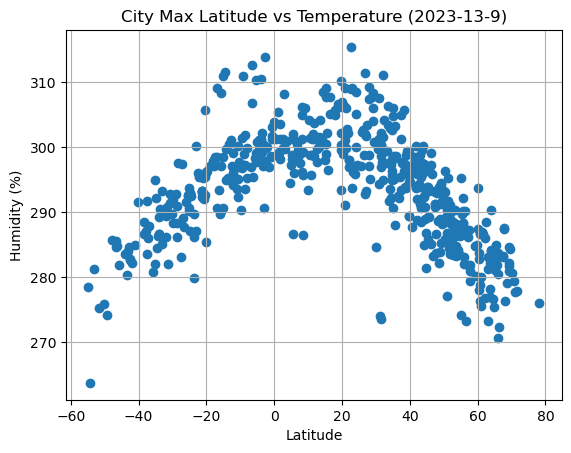

In [7]:
# Build scatter plot for latitude vs. temperature
x_value = city_data_df["Lat"]
y_value = city_data_df["Max Temp"]
plt.scatter(x_value, y_value)

# Incorporate the other graph properties
plt.title('City Max Latitude vs Temperature (2023-13-9)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

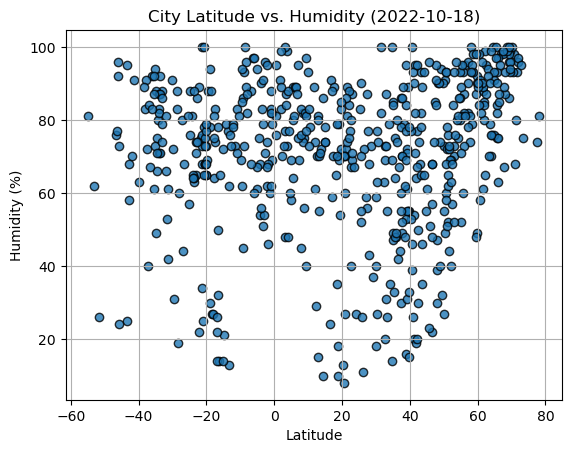

In [9]:
# Build the scatter plots for latitude vs. humidity
x_value = city_data_df["Lat"]
y_value = city_data_df["Humidity"]
plt.scatter(x_value, y_value)

# Incorporate the other graph properties
plt.title('City Max Latitude vs Humidity (2023-13-9)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

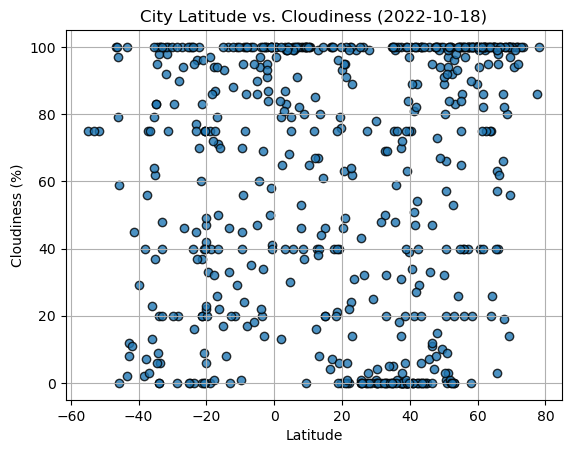

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_value = city_data_df["Lat"]
y_value = city_data_df["Cloudiness"]
plt.scatter(x_value, y_value)

# Incorporate the other graph properties
plt.title('City Max Latitude vs Cloudiness (2023-13-9)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

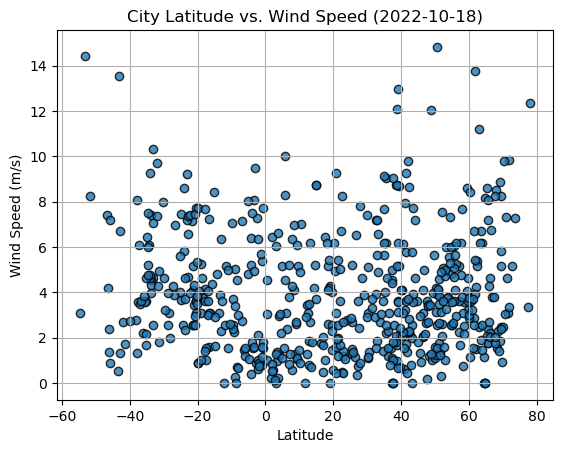

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_value = city_data_df["Lat"]
y_value = city_data_df["Wind Speed"]
plt.scatter(x_value, y_value)

# Incorporate the other graph properties
plt.title('City Max Latitude vs Wind Speed (2023-13-9)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Define a function to create Linear Regression plots
def reg(x_values, y_values, label, x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    reg_line = "y = " +str(round(slope, 3)) + "x + " +str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values)
    plt.annotate(reg_line, (x, y), fontsize=20)
    plt.xlabel("Latitude")
    plt.ylabel(label)
    plt.show

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat']) > 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,elverum,60.8819,11.5623,279.94,69,0,1.99,NO,1694632921
3,yellowknife,62.4560,-114.3525,288.44,67,100,3.60,CA,1694632532
4,tabas,33.5959,56.9244,306.27,10,0,2.06,IR,1694632922
6,alexandria,31.2156,29.9553,299.55,65,0,4.76,EG,1694632777
7,longyearbyen,78.2186,15.6401,276.06,70,75,8.23,SJ,1694632523


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat']) < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rio grande,-32.0350,-52.0986,286.21,91,100,10.17,BR,1694632642
1,puerto natales,-51.7236,-72.4875,275.29,98,100,0.43,CL,1694632659
5,xai-xai,-25.0519,33.6442,290.10,68,0,2.45,MZ,1694632922
8,ritchie,-29.0380,24.6028,292.71,36,0,5.12,ZA,1694632923
10,blackmans bay,-43.0167,147.3167,284.00,87,100,0.20,AU,1694632805


###  Temperature vs. Latitude Linear Regression Plot

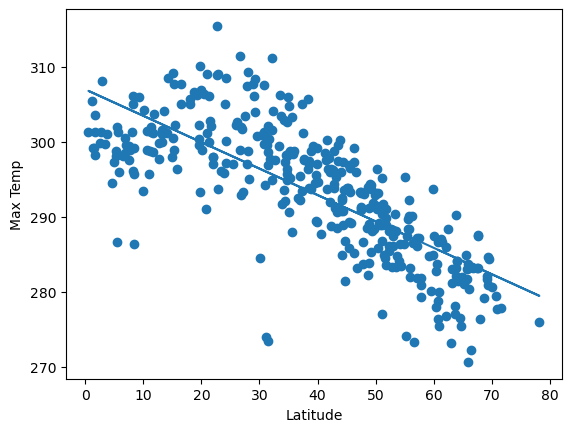

In [23]:
# Linear regression on Northern Hemisphere
reg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], "Max Temp", 10, 40)

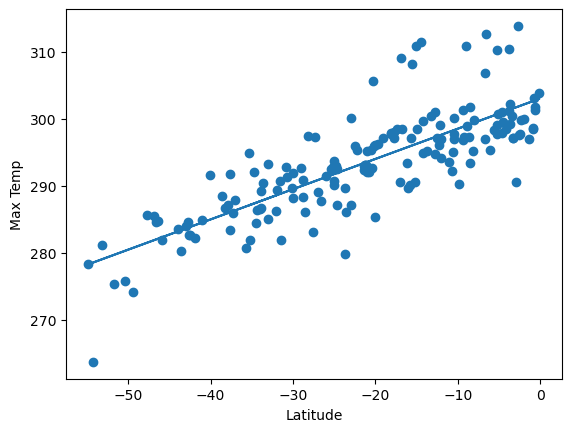

In [24]:
# Linear regression on Southern Hemisphere
reg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], "Max Temp", 10, 40)

**Discussion about the linear relationship:** The relationship is positively correlated, as the latitude increases in the northern hemisphere the temperature decreases as it is getting further away from the equator, while in the southern hemisphere there is an opposite relationship


### Humidity vs. Latitude Linear Regression Plot

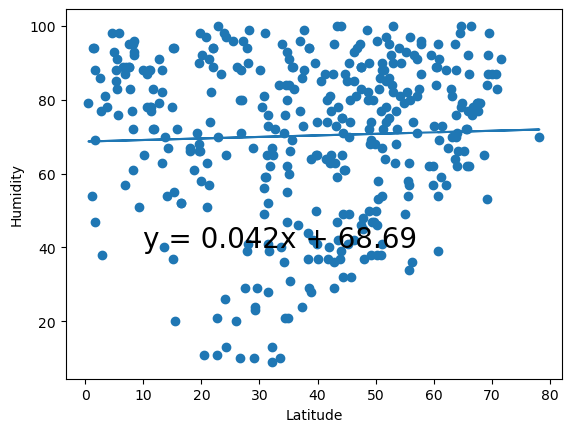

In [25]:
# Northern Hemisphere
reg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], "Humidity", 10, 40)

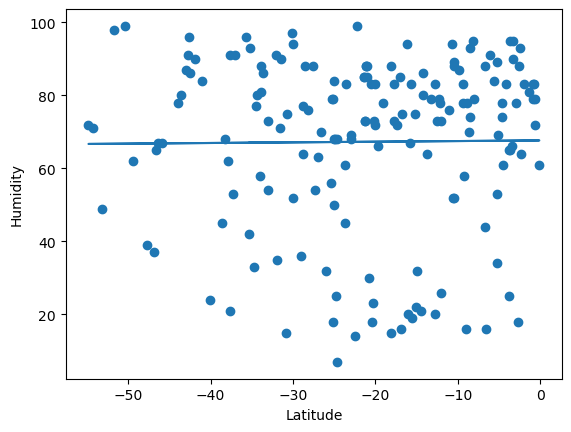

In [26]:
# Southern Hemisphere
reg(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], "Humidity", 10, 40)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [27]:
# Northern Hemisphere
reg(northern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], "Cloudiness", 10, 40)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 374 and the array at index 1 has size 171

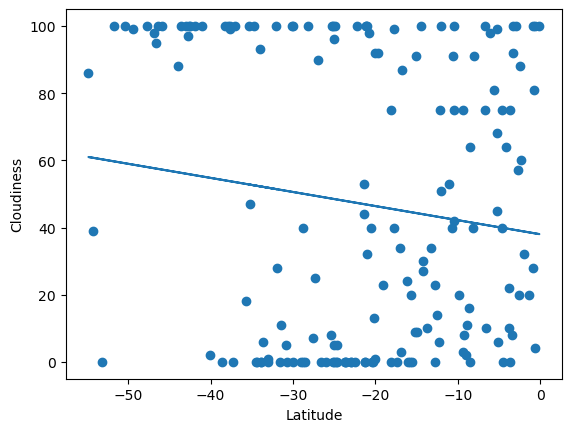

In [28]:
# Southern Hemisphere
reg(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], "Cloudiness", 10, 40)

**Discussion about the linear relationship:** There is no linear relationship in these two graphs, the data points are too scattered

### Wind Speed vs. Latitude Linear Regression Plot

In [30]:
# Northern Hemisphere
reg(northern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], "Wind Speed", 10, 40)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 374 and the array at index 1 has size 171

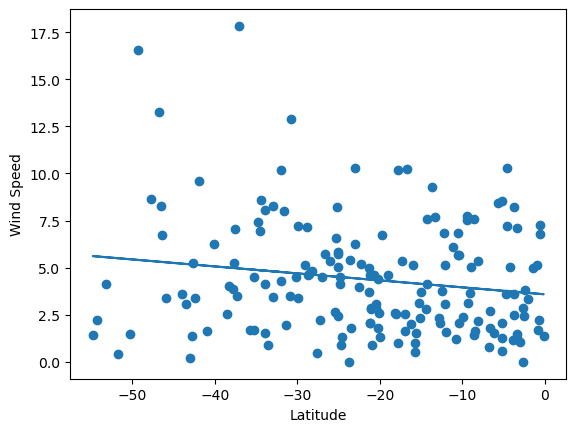

In [31]:
# Southern Hemisphere
reg(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], "Wind Speed", 10, 40)

**Discussion about the linear relationship:** There is no linear relationship in these two graphs, the data points are too scattered